# I. Perkenalan
Nama: Daffa Ilham Altaffitri
Batch: RMT-27

## Problems and Goals of this project
Perkenalkan Saya adalah Daffa Ilham konsultan pertanian yang di rekrut oleh Kementrian Pertanian Republik Indonesia untuk membantu mereka dalam menentukan tanaman apa yang akan dibudidayakan dalam food estate project terbaru mereka di seluruh Indonesia. Pemerintah mengalami kendala dalam menentukan tanaman apa yang harus dibudidayakan karena tidak ketersediaan SDM yang mampu memberikan solusi yang tepat. Goals dalam project ini adalah memberikan rekomendasi kepada pemerintah dengan cara membuat supervised learning project yang dapat memprediksi setiap input yang terdapat pada lingkungan food estate dapat berjalan dengan baik kepada tanaman budidaya yang dipilih, sehingga terjadi pertanian berkelanjutan (sustainable agriculture).

# II. Import Libraries

In [1]:
# basic
import pandas as pd
import numpy as np
import pickle
from scipy.stats import zscore

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, make_scorer

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns
%matplotlib inline
from scipy.stats import uniform
sns.set_style('darkgrid')
random_state = 42
from pprint import pprint  # Untuk output yang lebih rapi

import warnings
warnings.filterwarnings("ignore")

# III. Import Dataset

link dataset:https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

## Memahami Dataset

In [2]:
# load dataset
df = pd.read_csv(r'C:\Users\yossy\github-classroom\FTDS-assignment-bay\p1-ftds027-rmt-m2-Daffailh27\Crop_recommendation.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# IV. EDA

In [3]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Insights
- Berikut adalah penjelasan singkat mengenai kolom-kolom tersebut:

 N: Kadar Nitrogen dalam tanah
 P: Kadar Fosfor dalam tanah
 K: Kadar Kalium dalam tanah
 temperature: Suhu lingkungan (dalam Celsius)
 humidity: Kelembaban lingkungan (dalam persen)
 ph: Tingkat keasaman/kebasaan tanah
 rainfall: Curah hujan (dalam mm)
 label: Jenis tanaman yang direkomendasikan
 
 Dengan informasi ini, kita dapat melanjutkan dengan analisis eksplorasi data lebih lanjut untuk memahami distribusi dan hubungan antar variabel. Setelah itu, kita dapat memulai proses pembuatan model prediksi yang akan membantu menentukan tanaman budidaya terbaik berdasarkan kondisi lingkungan yang diberikan.

In [4]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
# melakukan analisa deskripsi statisti
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Insights:

- Berdasarkan statistik deskriptif dari dataset, kita dapat mengamati beberapa hal tentang kondisi lingkungan dan nutrisi tanah untuk tanaman yang berbeda:

 Nitrogen (N): Nilai rata-rata adalah sekitar 50.55, dengan nilai minimum 0 dan maksimum 140.
 Fosfor (P): Rata-rata kadar fosfor adalah 53.36, dengan nilai berkisar dari 5 hingga 145.
 Kalium (K): Rata-rata kadar kalium adalah 48.15, dengan rentang nilai dari 5 hingga 205.
 Suhu: Suhu rata-rata adalah 25.62°C, dengan rentang dari 8.83°C hingga 43.68°C.
 Kelembaban: Kelembaban rata-rata adalah 71.48%, dengan nilai dari 14.26% hingga hampir 100%.
 pH: Tingkat pH tanah rata-rata adalah 6.47, yang menunjukkan bahwa sebagian besar tanah memiliki kondisi netral hingga sedikit asam. pH berkisar dari 3.50 hingga 9.94.
 Curah Hujan: Curah hujan rata-rata adalah 103.46 mm, dengan rentang yang cukup lebar dari 20.21 mm hingga 298.56 mm.

## Inferential Statistics Analysis

Anova dan chi-squared

In [6]:
# uji ANOVA for N, P, and K untuk semu tanaman
anova_results = {}

for nutrient in ['N', 'P', 'K']:
    anova_data_nutrient = [df[nutrient][df['label'] == crop] for crop in df['label'].unique()]
    anova_result_nutrient = stats.f_oneway(*anova_data_nutrient)
    anova_results[nutrient] = anova_result_nutrient

anova_results

{'N': F_onewayResult(statistic=897.5681863257125, pvalue=0.0),
 'P': F_onewayResult(statistic=1885.657859184262, pvalue=0.0),
 'K': F_onewayResult(statistic=27238.36206707328, pvalue=0.0)}

### Insights
- Hasil Uji ANOVA untuk Nitrogen (N), Fosfor (P), dan Kalium (K) di antara berbagai jenis tanaman adalah sebagai berikut:

 1. Nitrogen (N): Statistik F = 897.57, P-Value = 0.0
 2. Fosfor (P): Statistik F = 1885.66, P-Value = 0.0
 3. Kalium (K): Statistik F = 27238.36, P-Value = 0.0

 P-value yang sangat kecil (0.0 dalam representasi ini menunjukkan nilai yang sangat mendekati nol) untuk ketiga uji menunjukkan bahwa kita dapat menolak hipotesis nol yang menyatakan tidak ada perbedaan yang signifikan dalam rata-rata nilai N, P, dan K di antara jenis tanaman yang berbeda. Ini berarti bahwa perbedaan dalam kebutuhan nutrisi tanah (Nitrogen, Fosfor, dan Kalium) antara berbagai jenis tanaman adalah signifikan secara statistik.

### Chi-Squared
 Untuk Uji Chi-Square,  perlu mengkategorikan salah satu dari variabel numerik. Sebagai contoh, kita dapat mengkategorikan "curah hujan" menjadi 'rendah', 'sedang', dan 'tinggi' berdasarkan kuartilnya, kemudian menganalisis hubungannya dengan jenis tanaman. Namun, perlu dicatat bahwa Uji Chi-Square memerlukan data kategorikal untuk kedua variabel yang dianalisis, sehingga kita perlu melakukan pra-pengolahan sebelum melaksanakan uji tersebut.

In [7]:
# Categorize rainfall into 'low', 'medium', 'high' based on quartiles
rainfall_quartiles = df['rainfall'].quantile([0.33, 0.66])
df['rainfall_category'] = pd.cut(df['rainfall'], bins=[df['rainfall'].min()-1, rainfall_quartiles[0.33], rainfall_quartiles[0.66], df['rainfall'].max()], labels=['low', 'medium', 'high'])

# Menghitung jumlah nilai dalam setiap kategori 'rainfall_category'
category_counts = df['rainfall_category'].value_counts()

print(category_counts)

rainfall_category
high      748
low       726
medium    726
Name: count, dtype: int64


### Important Notes: terkait penambahan feature/kolom kategori curah hujan
Dalam konteks ilmiah, pembagian kategori curah hujan seringkali didasarkan pada pedoman yang ditetapkan oleh lembaga meteorologi atau penelitian terkait iklim. Meskipun tidak ada satu standar global yang diterima oleh semua, beberapa klasifikasi umum mencakup:

Rendah (Low): Kurang dari 1000 mm per tahun.
Sedang (Moderate): 1000 mm hingga 2000 mm per tahun.
Tinggi (High): Lebih dari 2000 mm per tahun.

Namun, klasifikasi di atas berlaku untuk pengukuran tahunan dan mungkin tidak langsung relevan untuk dataset dengan curah hujan yang mungkin diukur dalam jangka waktu yang lebih pendek (misalnya, per bulan atau per musim). Karena dataset ini tampaknya mencatat curah hujan dalam satuan yang tidak ditentukan (mungkin mm per periode tertentu yang lebih pendek dari satu tahun), Saya perlu menyesuaikan kategori ini untuk konteks dataset.

Mengingat dataset dan kebutuhan untuk aplikasi praktis dalam konteks seperti pertanian atau penelitian jangka pendek, bisa menggunakan pendekatan batasan yang lebih sesuai untuk skala waktu yang lebih pendek. Sebagai contoh praktis yang lebih sesuai untuk dataset ini, Saya mempertimbangkan menggunakan rentang yang menyesuaikan dengan distribusi data yang ada:

1. low: Kurang dari atau sama dengan kuartil pertama (25%), yaitu kurang dari atau sama dengan 64.55 mm.
2. medium: Lebih dari kuartil pertama (25%) dan kurang dari atau sama dengan kuartil ketiga (75%), yaitu antara 64.55 mm dan 124.27 mm.
3. high: Lebih dari kuartil ketiga (75%), yaitu lebih dari 124.27 mm.

In [8]:
# Create a contingency table for Chi-Square test
contingency_table = pd.crosstab(df['label'], df['rainfall_category'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

chi2_result = {
    'chi2_statistic': chi2,
    'p_value': p,
    'degrees_of_freedom': dof
}

chi2_result, contingency_table.head()

({'chi2_statistic': 2810.4010695187167,
  'p_value': 0.0,
  'degrees_of_freedom': 42},
 rainfall_category  low  medium  high
 label                               
 apple                0      42    58
 banana               0      68    32
 blackgram           71      29     0
 chickpea            16      84     0
 coconut              0       0   100)

### Insights
- Hasil Uji Chi-Square untuk hubungan antara kategori curah hujan ('rendah', 'sedang', 'tinggi') dan jenis tanaman adalah sebagai berikut:

 1. Chi-Square Statistik: 2810.40
 2. P-Value: 0.0
 3. Derajat Kebebasan (Degrees of Freedom): 42
 4. P-value yang sangat kecil (0.0, menunjukkan nilai yang sangat mendekati nol) menunjukkan bahwa kita dapat menolak hipotesis nol yang menyatakan tidak ada hubungan antara kategori curah hujan dan jenis tanaman. Ini berarti bahwa terdapat hubungan yang signifikan secara statistik antara kategori curah 
 hujan dan jenis tanaman yang direkomendasikan.

- Tabel kontinjensi yang ditampilkan memberikan gambaran tentang bagaimana distribusi jenis tanaman bervariasi tergantung pada kategori curah hujan. Sebagai contoh, kita dapat melihat bahwa semua contoh 'coconut' (kelapa) berada dalam kategori curah hujan 'tinggi', sedangkan 'blackgram' mayoritas berada dalam kategori curah hujan 'rendah'.

- Hasil ini menunjukkan pentingnya mempertimbangkan kondisi curah hujan dalam rekomendasi jenis tanaman untuk pertanian berkelanjutan, serta memperlihatkan bahwa kebutuhan nutrisi tanah (N, P, K) juga bervariasi secara signifikan di antara berbagai jenis tanaman.

## Visualisasi

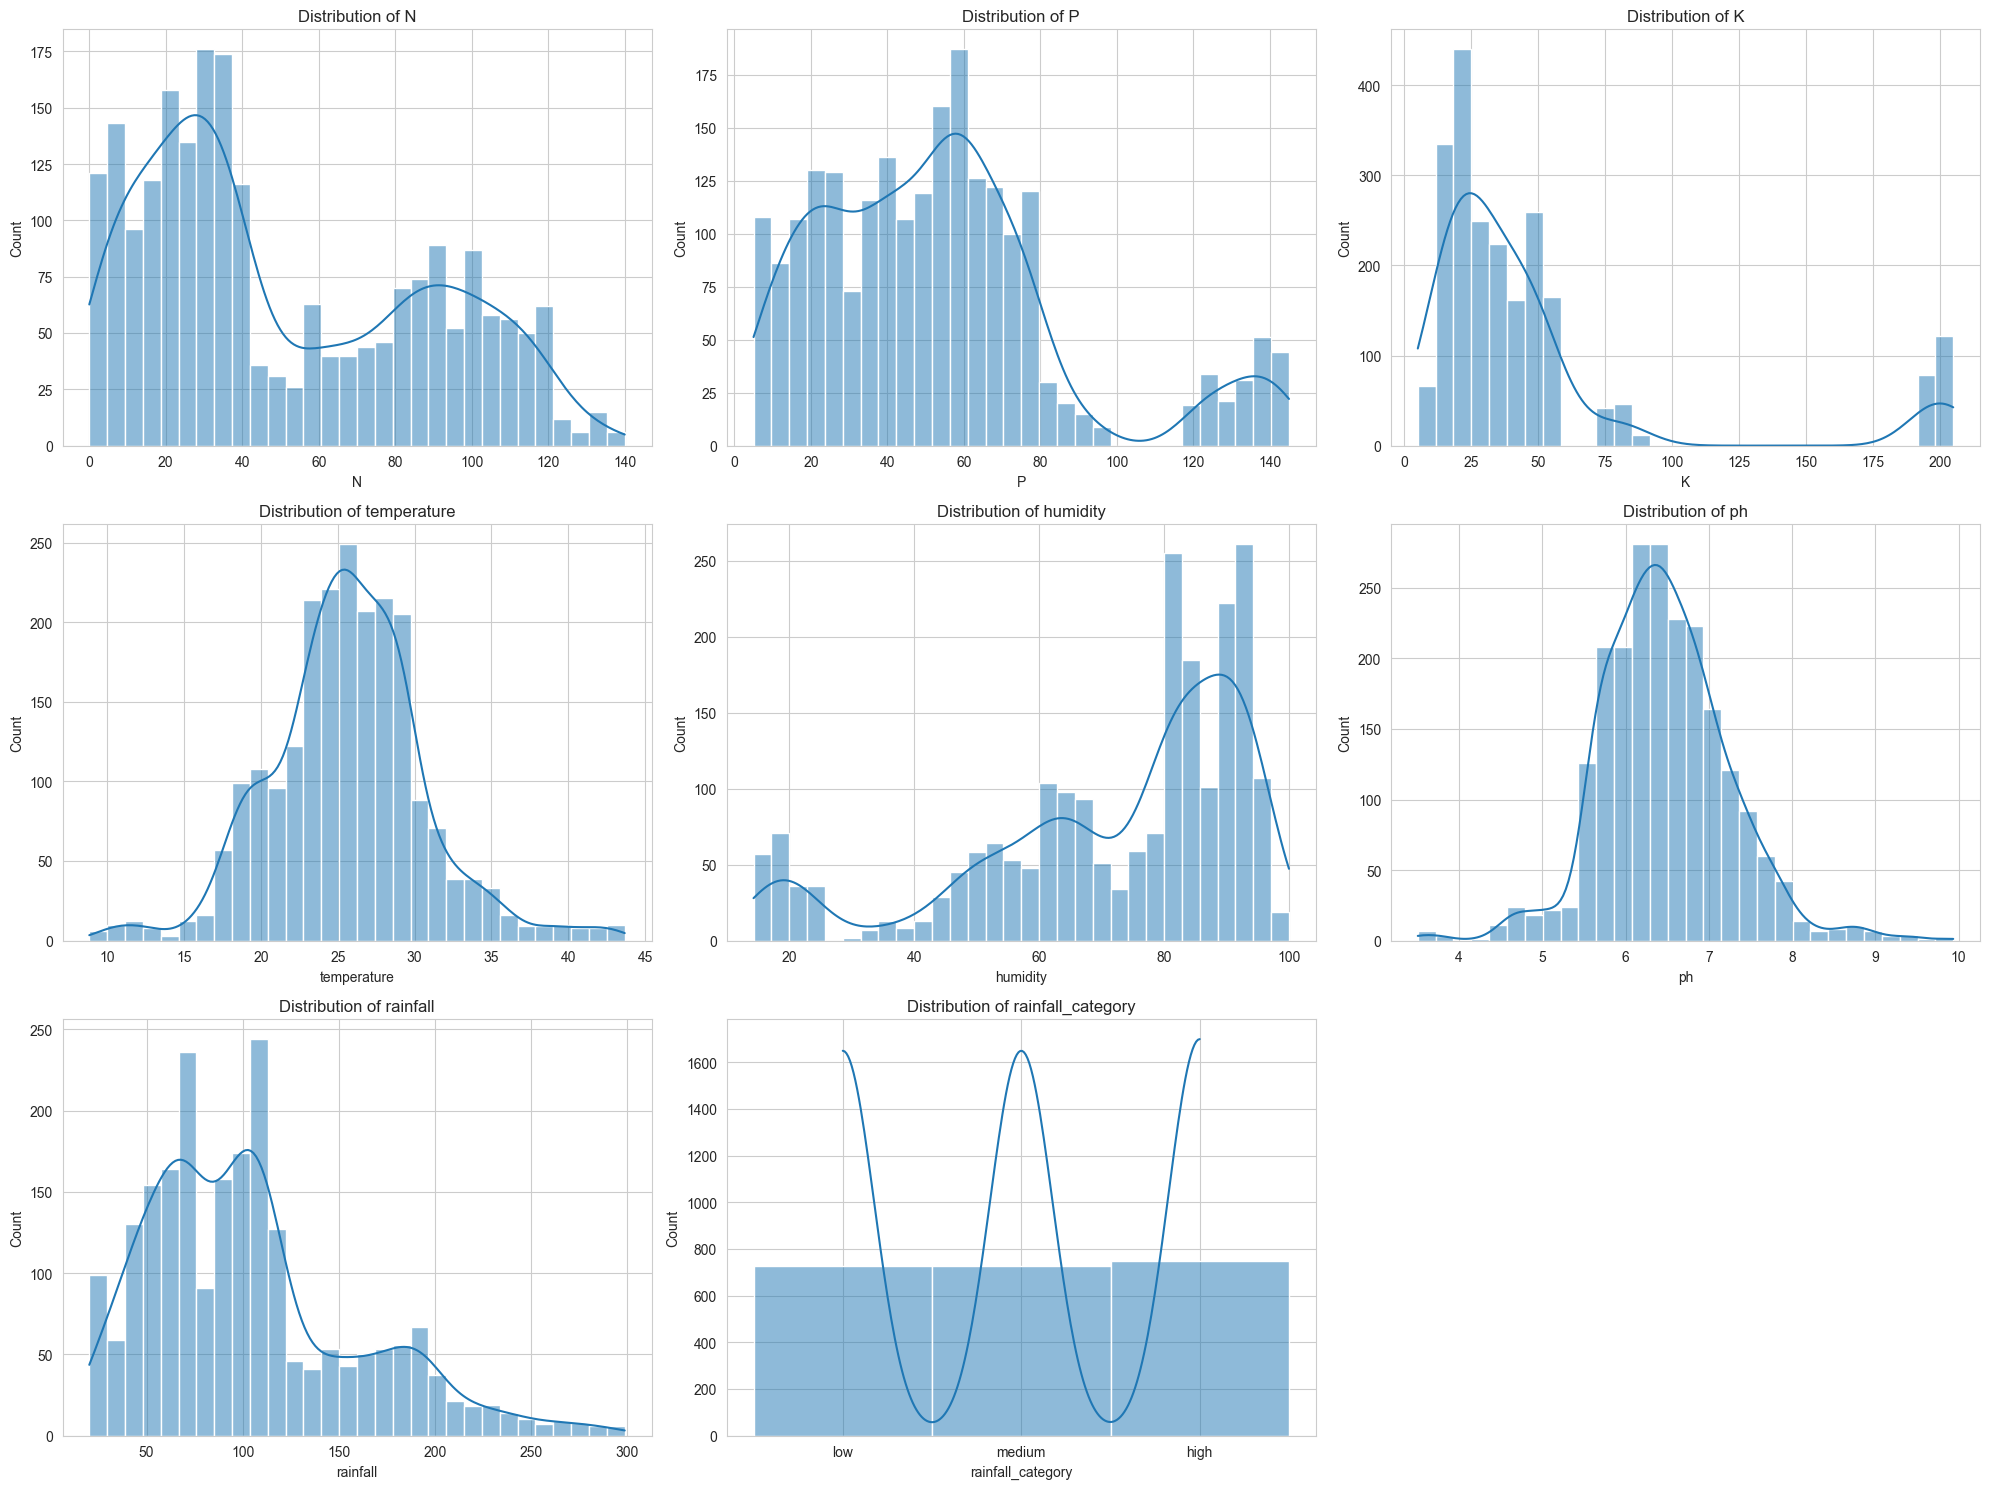

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Plotting distribution of numeric variables
for i, column in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'rainfall_category'], start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


### Insights:
- Dari histogram di atas, kita dapat mengamati beberapa hal tentang distribusi variabel numerik dalam dataset:

 Nitrogen (N), Fosfor (P), dan Kalium (K): Distribusi nilai nutrisi tanah ini menunjukkan variasi yang cukup lebar, dengan beberapa puncak yang menunjukkan bahwa tanaman tertentu mungkin memerlukan konsentrasi nutrisi tertentu yang spesifik.

 Suhu: Distribusi suhu cenderung normal dengan sedikit kecenderungan ke suhu yang lebih tinggi, menunjukkan bahwa sebagian besar tanaman dalam dataset ini mungkin tumbuh optimal di lingkungan yang hangat.

 Kelembaban: Terdapat variasi luas dalam distribusi kelembaban, dengan sebagian besar tanaman memerlukan kelembaban yang relatif tinggi.
 
 pH: pH tanah menunjukkan distribusi yang cukup simetris dan terpusat di sekitar netral, yang menunjukkan fleksibilitas tanaman terhadap kondisi keasaman tanah.

 Curah Hujan: Distribusi curah hujan menunjukkan variasi yang signifikan, dengan sejumlah tanaman yang memerlukan banyak air dan lainnya yang memerlukan lebih sedikit.

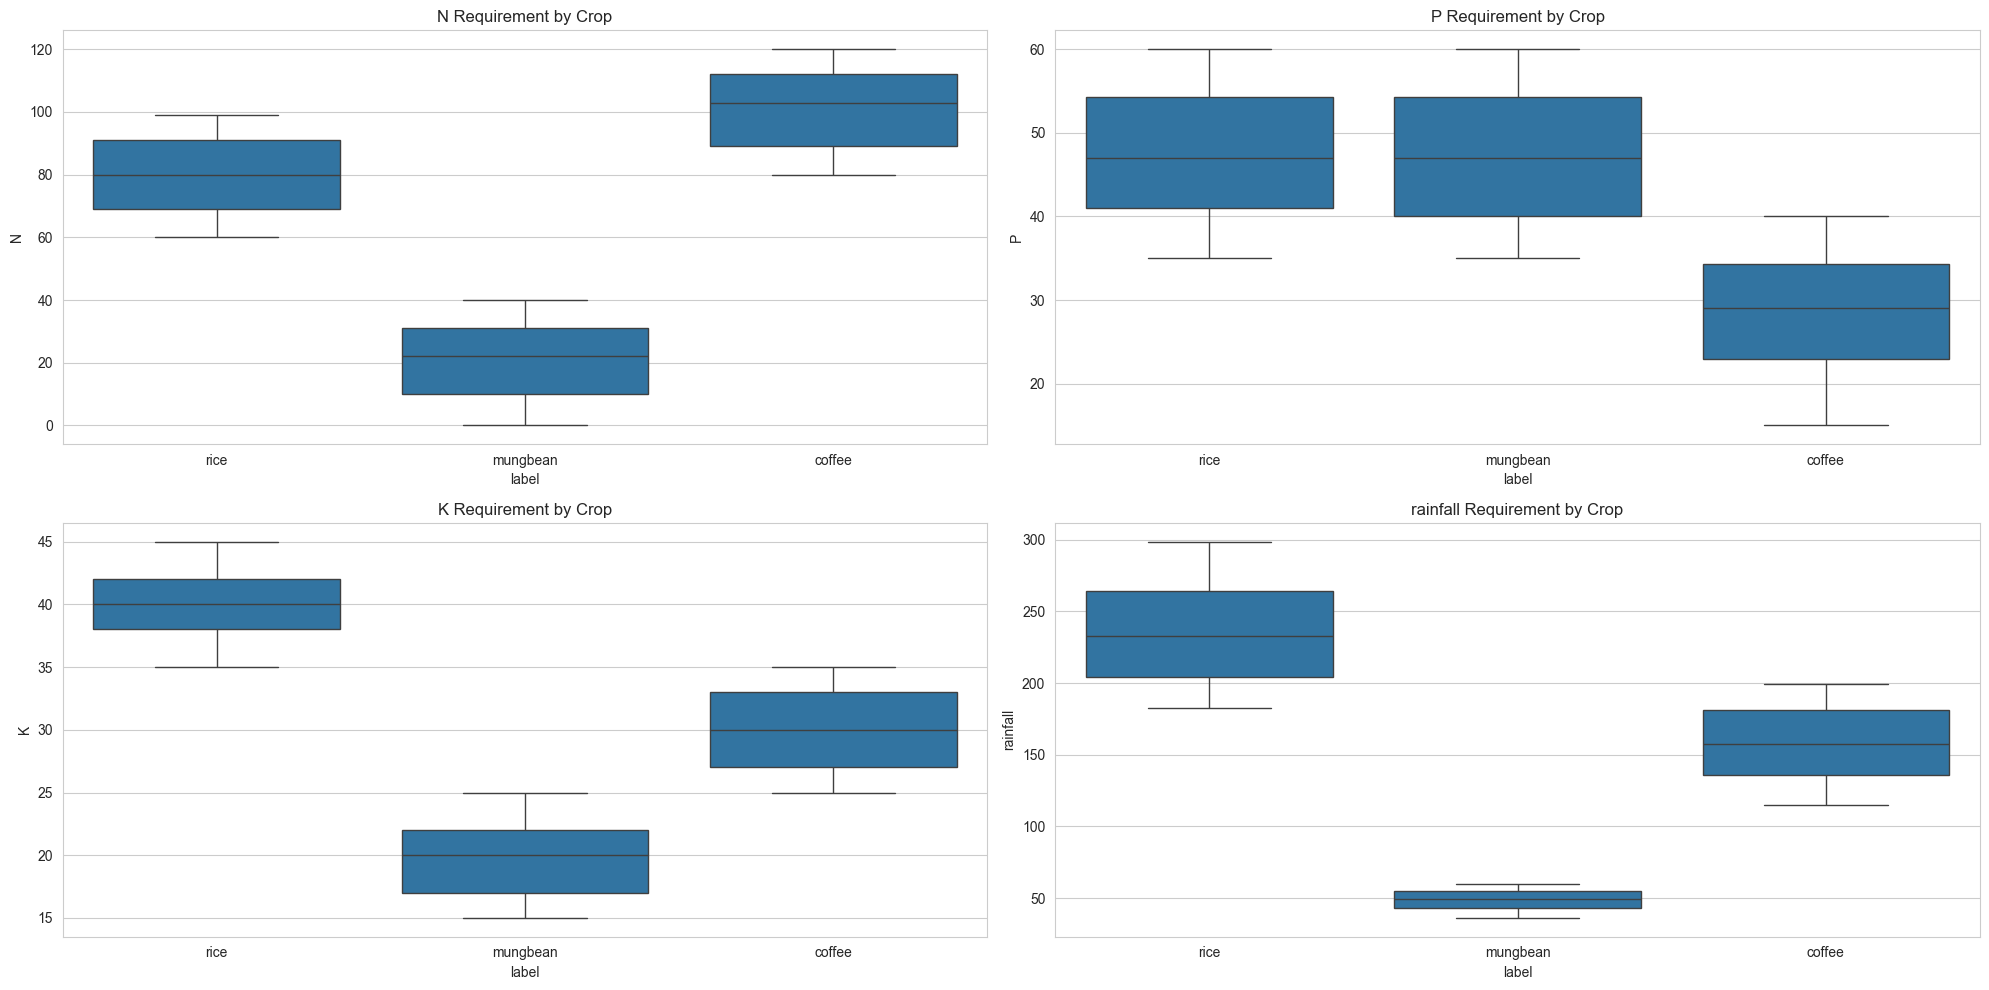

In [10]:
# Selecting a subset of crops for clearer visualization
selected_crops = ['rice', 'wheat', 'mungbean', 'coffee']

# Filter the dataframe for the selected crops
df_selected_crops = df[df['label'].isin(selected_crops)]

# Initialize the figure
plt.figure(figsize=(20, 10))

# Plotting boxplots for N, P, K, and rainfall across selected crops
for i, column in enumerate(['N', 'P', 'K', 'rainfall'], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='label', y=column, data=df_selected_crops)
    plt.title(f'{column} Requirement by Crop')

plt.tight_layout()
plt.show()

### Insights: 
- Dari boxplot untuk kebutuhan Nitrogen (N), Fosfor (P), Kalium (K), dan curah hujan terhadap beberapa jenis tanaman terpilih (padi, gandum, mungbean, dan kopi), kita dapat mengamati:

 Nitrogen (N): Padi (rice) dan kopi (coffee) menunjukkan kebutuhan nitrogen yang lebih tinggi dibandingkan dengan gandum (wheat) dan mungbean. Ini 
 menunjukkan bahwa beberapa tanaman memerlukan lebih banyak nutrisi tertentu untuk pertumbuhan optimal.

 Fosfor (P): Kebutuhan fosfor relatif tinggi pada kopi, sementara tanaman lain menunjukkan kebutuhan yang lebih moderat. Variasi ini menunjukkan spesifikasi nutrisi yang berbeda antar jenis tanaman.
 
 Kalium (K): Kebutuhan kalium cenderung lebih seragam dibandingkan dengan N dan P, namun masih terdapat perbedaan, terutama kopi yang tampak memerlukan lebih banyak K.

 Curah Hujan: Padi membutuhkan curah hujan yang jauh lebih tinggi dibandingkan dengan tanaman lain, yang sesuai dengan karakteristiknya sebagai tanaman yang tumbuh di area berair. Kopi juga menunjukkan kebutuhan akan curah hujan yang relatif tinggi, sedangkan gandum dan mungbean memerlukan lebih sedikit air.

Visualisasi ini membantu dalam memahami kebutuhan spesifik dari berbagai jenis tanaman terhadap kondisi lingkungan dan nutrisi tanah, yang dapat digunakan untuk menyesuaikan rekomendasi budidaya tanaman berdasarkan kondisi setempat.

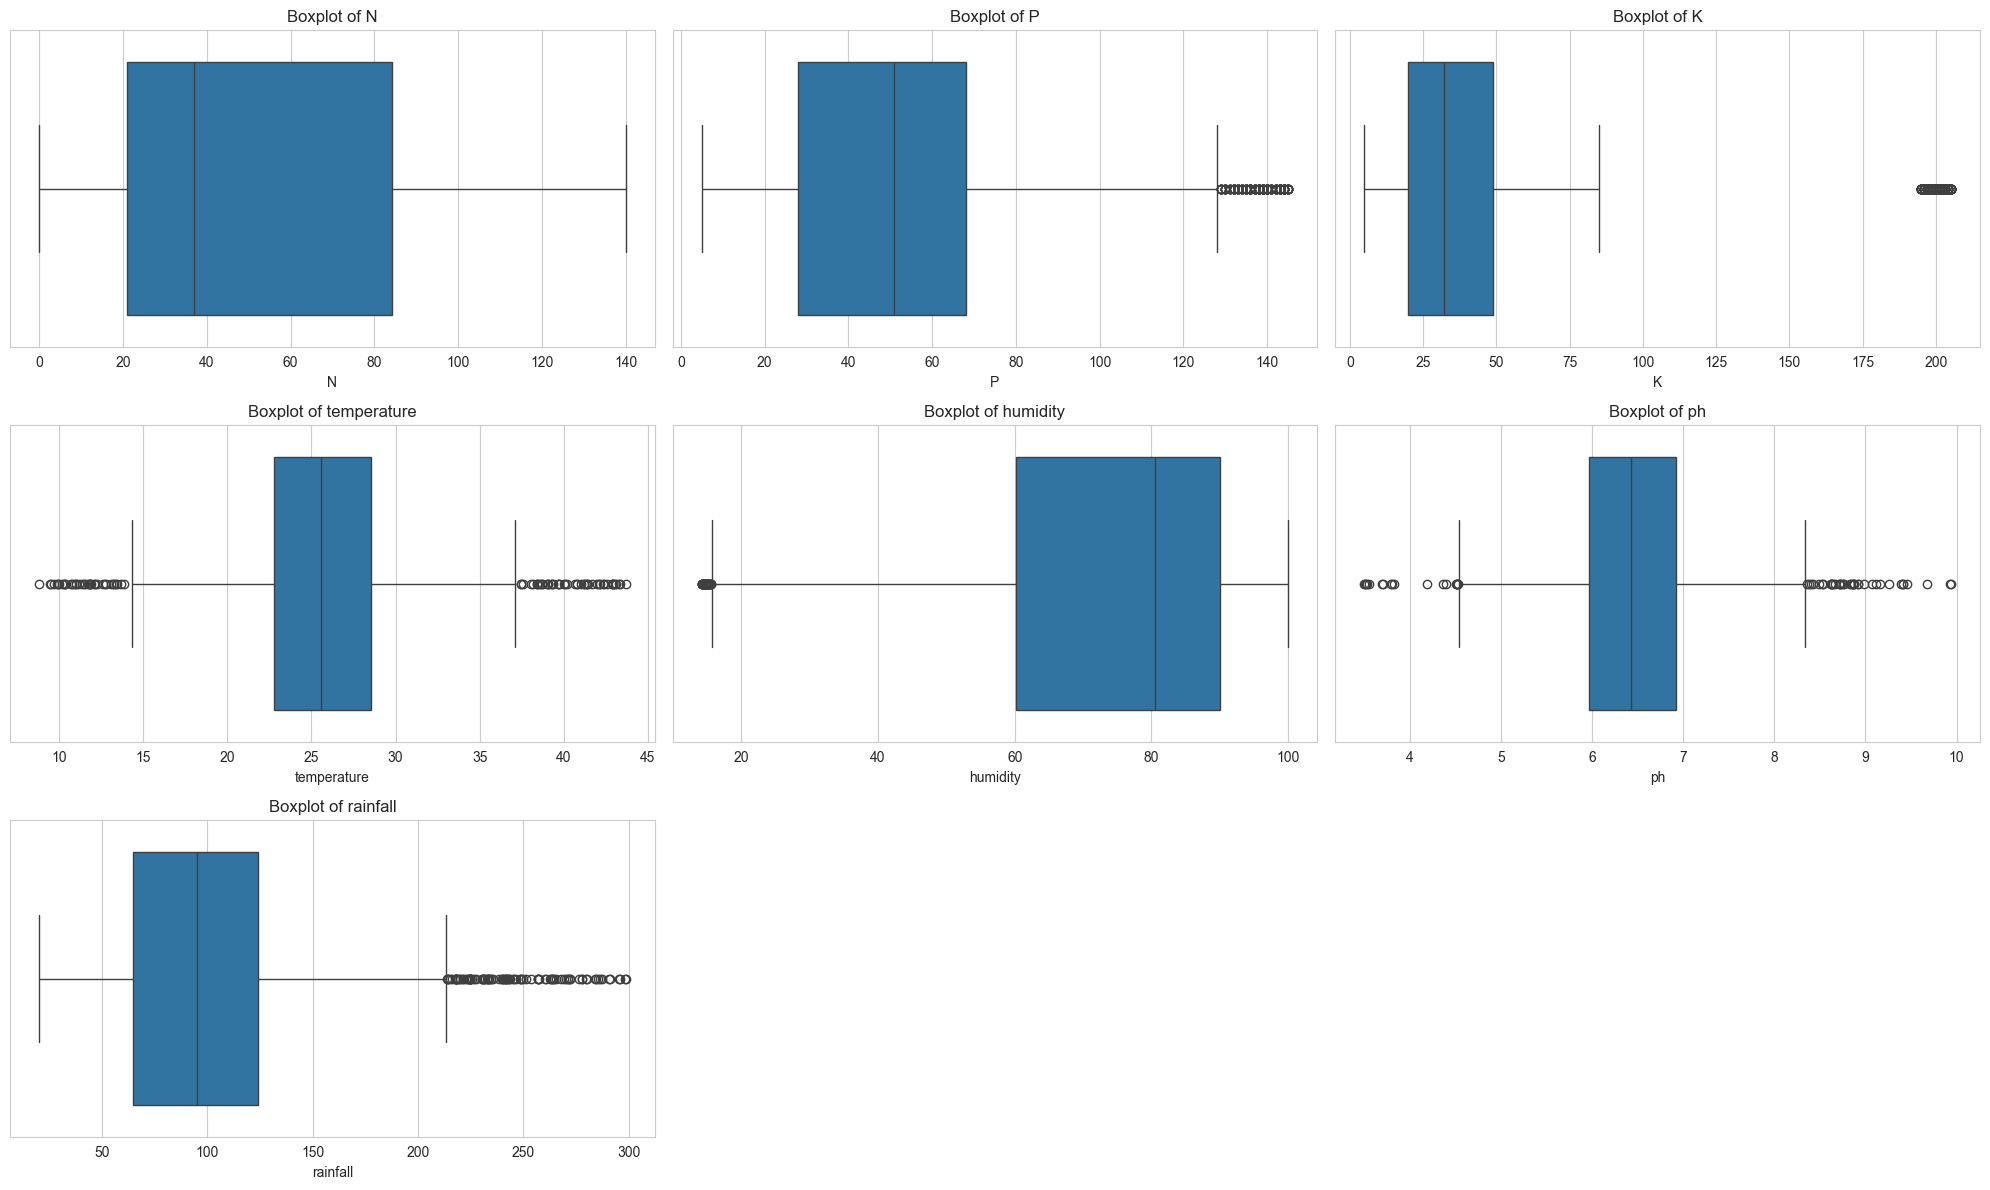

In [11]:
# cek outlier
plt.figure(figsize=(20, 12))

# Plotting boxplots for key variables
for i, column in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

### Insights dari cek outlier

Dari boxplot untuk masing-masing variabel (Nitrogen (N), Fosfor (P), Kalium (K), suhu, kelembaban, pH, dan curah hujan), kita dapat mengamati beberapa hal:

Nitrogen (N), Fosfor (P), dan Kalium (K): Ada beberapa outlier terlihat untuk Nitrogen, Fosfor, dan terutama Kalium, di mana beberapa nilai jauh melampaui "whisker" atas dari boxplot.

Suhu dan Kelembaban: Kedua variabel ini tampaknya memiliki distribusi yang lebih konsisten dengan beberapa outlier. Untuk suhu, outlier terlihat pada nilai yang lebih rendah, sedangkan kelembaban memiliki outlier pada nilai yang lebih rendah dan lebih tinggi.

pH: Terdapat beberapa outlier pada kedua sisi distribusi, menunjukkan beberapa nilai pH yang sangat rendah dan sangat tinggi dibandingkan dengan sebagian besar data.

Curah Hujan: Signifikan outlier terlihat pada nilai yang lebih tinggi, menunjukkan adanya pengamatan dengan curah hujan sangat tinggi dibandingkan dengan sebagian besar dataset.

In [12]:
# cek skewneess
skewness_values = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].skew()

skewness_values

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

### Insights: 
Berikut adalah nilai skewness untuk variabel utama dalam dataset:

Nitrogen (N): 0.51, menunjukkan distribusi yang sedikit miring ke kanan.

Fosfor (P): 1.01, menunjukkan distribusi yang cukup miring ke kanan.

Kalium (K): 2.38, menunjukkan distribusi yang sangat miring ke kanan.

Suhu (temperature): 0.18, menunjukkan distribusi yang hampir simetris.

Kelembaban (humidity): -1.09, menunjukkan distribusi yang miring ke kiri.

pH: 0.28, menunjukkan distribusi yang hampir simetris.

Curah Hujan (rainfall): 0.97, menunjukkan distribusi yang cukup miring ke kanan.

Dari analisis skewness ini, kita dapat melihat bahwa sebagian besar variabel cenderung memiliki distribusi yang tidak sepenuhnya simetris. Khususnya, Kalium (K) memiliki skewness yang sangat tinggi, menunjukkan keberadaan nilai-nilai ekstrim yang jauh lebih tinggi dibandingkan dengan median, yang juga diperkuat oleh analisis outlier sebelumnya. Kelembaban menunjukkan skewness negatif, menandakan ekor distribusi yang lebih panjang di nilai rendah.

In [13]:
# Calculate Z-Score for the 'temperature' variable
df['temperature_zscore'] = zscore(df['temperature'])

# Identify outliers as any point where the absolute Z-Score is greater than 3
outliers_temperature = df[(df['temperature_zscore'] > 3) | (df['temperature_zscore'] < -3)]

# Number of outliers
num_outliers = outliers_temperature.shape[0]

# Remove the Z-Score column to clean up the dataframe
df.drop('temperature_zscore', axis=1, inplace=True)

num_outliers, outliers_temperature[['temperature']]

(33,
       temperature
 1211     9.467960
 1214     8.825675
 1247    41.186649
 1250    10.380048
 1259    41.207336
 1275    41.656030
 1279    41.361063
 1287    41.948657
 1291     9.724458
 1293     9.535586
 1295     9.851243
 1299     9.949929
 1633    10.010813
 1677    10.270888
 1680    10.356096
 1684    10.164313
 1701    42.394134
 1704    42.923253
 1710    42.134740
 1722    43.302049
 1738    42.304958
 1742    42.846093
 1743    43.675493
 1744    42.072138
 1747    41.419684
 1748    42.547440
 1750    43.080227
 1752    41.042244
 1758    42.933686
 1761    43.360515
 1766    43.037143
 1778    42.936054
 1797    41.313301)

### Insights
Dalam analisis outlier menggunakan Z-Score untuk variabel suhu, kita menemukan 33 outlier. Nilai-nilai ini memiliki Z-Score absolut lebih besar dari 3, yang menunjukkan bahwa mereka berada jauh dari mean dibandingkan dengan sebagian besar data. Nilai suhu untuk outlier ini berkisar dari sangat rendah (sekitar 8.83°C) hingga sangat tinggi (sekitar 43.68°C), yang menunjukkan variasi suhu ekstrem yang jauh dari kondisi rata-rata.

Perlu diperhatikan bahwa data tersebut dalam dunia pertanian bukan termasuk outlier melainkan hal yang natural. Pada suatu daerah mungkin saja dapat terjadi perubahan kondisi lingkungan ekstrim. Perlu kebijaksanaan dari para stakeholder untuk menanggulangi masalah ini, maka sebagai seorang konsultan saya akan anggap outlier ini adalah ke-alamian yang terjadi pada lingkungan dan bukan outliers yang harus dibuang.

# V. Feature Engineering

In [14]:
# Pemisahan feature dan label dari dataset

x = df.drop(['label'], axis=1)
y = df[['label']]
x.head()

,N,P,K,temperature,humidity,ph,rainfall,rainfall_category
0,90,42,43,20.879744,82.002744,6.502985,202.935536,high
1,85,58,41,21.770462,80.319644,7.038096,226.655537,high
2,60,55,44,23.004459,82.320763,7.840207,263.964248,high
3,74,35,40,26.491096,80.158363,6.980401,242.864034,high
4,78,42,42,20.130175,81.604873,7.628473,262.717340,high


In [15]:
# Split data menjadi data train dan test 70:30

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3, random_state=21)

xTrain

,N,P,K,temperature,humidity,ph,rainfall,rainfall_category
403,27,57,24,27.335349,43.357960,6.091863,142.330368,high
698,23,45,23,28.776535,86.691340,6.983130,56.124432,low
2044,94,37,41,24.763452,87.060711,6.463539,179.163086,high
821,13,61,24,18.297836,69.689762,7.629910,49.391115,low
1936,113,38,25,22.000851,79.472710,7.388266,90.422242,medium
...,...,...,...,...,...,...,...,...
1144,31,29,26,28.223734,47.405191,5.024125,97.768323,medium
48,79,43,39,21.666283,80.709606,7.062779,210.814209,high
772,21,80,20,28.206673,68.270852,7.350870,64.328871,low
1848,29,17,29,29.203949,95.669973,5.959493,211.250627,high


In [16]:
# Identifikasi fitur kategorik dan numerik
categorical_features = xTrain.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = xTrain.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Memisahkan fitur kategorik dan numerik
xTrain_categorical = xTrain[categorical_features]
xTrain_numerical = xTrain[numerical_features]

# Menampilkan nama kolom untuk masing-masing tipe fitur
categorical_features, numerical_features

(['rainfall_category'],
 ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

In [17]:
# Memisahkan fitur kategorik dan numerik dari set pengujian (xTest)
xTest_categorical = xTest.select_dtypes(include=['object', 'category']).columns.tolist()
xTest_numerical = xTest.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Melakukan pemisahan
xTest_categorical_data = xTest[xTest_categorical]
xTest_numerical_data = xTest[xTest_numerical]

# Menampilkan nama kolom untuk masing-masing tipe fitur pada set pengujian
xTest_categorical, xTest_numerical

(['rainfall_category'],
 ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

## Handling Missing Value

In [18]:
# Cek missing value untuk set pelatihan (fitur numerik, fitur kategorik, dan target)
missing_values_train_numerical = xTrain_numerical.isnull().sum()
missing_values_train_categorical = xTrain_categorical.isnull().sum()
missing_values_train_y = yTrain.isnull().sum()

# Cek missing value untuk set pengujian (fitur numerik dan fitur kategorik)
# Memisahkan fitur kategorik dan numerik dari xTest
xTest_categorical = xTest.select_dtypes(include=['object', 'category'])
xTest_numerical = xTest.select_dtypes(include=['int64', 'float64'])

missing_values_test_numerical = xTest_numerical.isnull().sum()
missing_values_test_categorical = xTest_categorical.isnull().sum()
missing_values_test_y = yTest.isnull().sum()

missing_values_train_numerical, missing_values_train_categorical, missing_values_train_y, missing_values_test_numerical, missing_values_test_categorical, missing_values_test_y

(N              0
 P              0
 K              0
 temperature    0
 humidity       0
 ph             0
 rainfall       0
 dtype: int64,
 rainfall_category    0
 dtype: int64,
 label    0
 dtype: int64,
 N              0
 P              0
 K              0
 temperature    0
 humidity       0
 ph             0
 rainfall       0
 dtype: int64,
 rainfall_category    0
 dtype: int64,
 label    0
 dtype: int64)

Tidak ada missing value yang ditemukan dalam fitur numerik, fitur kategorik (rainfall_category), atau dalam target (label) pada set pelatihan.

## Pipeline
Encoding, scaling jadi satu

In [19]:
# Tentukan kolom untuk masing-masing scaler
columns_standard_scaler = ['temperature', 'ph']  # Kolom untuk StandardScaler
columns_robust_scaler = ['N', 'P', 'K', 'humidity', 'rainfall']  # Kolom untuk RobustScaler

# Pembuatan transformer baru dengan StandardScaler dan RobustScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num_robust', RobustScaler(), columns_robust_scaler),
        ('num_standard', StandardScaler(), columns_standard_scaler),
        ('cat', OrdinalEncoder(), ['rainfall_category'])
    ])

# V. Model Definition

In [20]:
# Membuat pipeline untuk semua model dengan preprocessing yang sama
all_pipelines = {
    "Logistic Regression": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "KNN": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    "Decision Tree": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]),
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ]),
    "Gradient Boosting": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier())
    ]),
    "SVM": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ]),
    "Naive Bayes": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ])
}

# VII. Model Training

In [21]:
# Melatih setiap pipeline yang telah dibuat
for name, pipeline in all_pipelines.items():
    pipeline.fit(xTrain, yTrain.values.ravel())  # Menggunakan xTrain yang belum di-encode

# Konfirmasi bahwa pipeline telah diperbarui dan dilatih
"sudah dilatih."

'sudah dilatih.'

# VIII. Model Evaluation

In [22]:
# Dictionary untuk menyimpan laporan klasifikasi setiap model
classification_reports = {}

for name, pipeline in all_pipelines.items():
    # Membuat prediksi dengan set pengujian
    y_pred = pipeline.predict(xTest)
    
    # Menghitung laporan klasifikasi
    report = classification_report(yTest, y_pred, output_dict=True)
    classification_reports[name] = report

# Untuk menampilkan laporan klasifikasi, kita bisa melakukan loop melalui classification_reports
for model_name, report in classification_reports.items():
    print(f"Model: {model_name}")
    print("Classification Report:")
    for key, value in report.items():
        if isinstance(value, dict):  # Untuk skor kelas spesifik
            print(f"Class {key}:")
            for score_name, score_value in value.items():
                print(f"  {score_name}: {score_value:.2f}")
        else:  # Untuk rata-rata/makro/weighted avg
            print(f"{key}: {value:.2f}")
    print("======================================\n")

Model: Logistic Regression
Classification Report:
Class apple:
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 24.00
Class banana:
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 32.00
Class blackgram:
  precision: 0.90
  recall: 0.88
  f1-score: 0.89
  support: 32.00
Class chickpea:
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 28.00
Class coconut:
  precision: 0.93
  recall: 1.00
  f1-score: 0.97
  support: 28.00
Class coffee:
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 37.00
Class cotton:
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 28.00
Class grapes:
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 33.00
Class jute:
  precision: 0.89
  recall: 0.97
  f1-score: 0.93
  support: 34.00
Class kidneybeans:
  precision: 0.97
  recall: 0.97
  f1-score: 0.97
  support: 29.00
Class lentil:
  precision: 0.83
  recall: 0.91
  f1-score: 0.87
  support: 33.00
Class maize:
  precision: 1.00
  recall: 1.00
  f1-

## precision score

In [23]:
# Inisialisasi list untuk menyimpan hasil
train_accuracies = []
test_accuracies = []
model_names = []

for name, pipeline in all_pipelines.items():
    # Hitung akurasi pada set pelatihan
    train_accuracy = pipeline.score(xTrain, yTrain) * 100  # Mengubah menjadi persentase
    train_accuracies.append(train_accuracy)
    
    # Hitung akurasi pada set pengujian
    test_accuracy = pipeline.score(xTest, yTest) * 100  # Mengubah menjadi persentase
    test_accuracies.append(test_accuracy)
    
    # Simpan nama model
    model_names.append(name)

# Cetak hasil
print("Model Performance (Accuracy %):")
print("================================")
for i in range(len(model_names)):
    print(f"{model_names[i]}: Training Accuracy = {train_accuracies[i]:.2f}%, Testing Accuracy = {test_accuracies[i]:.2f}%")

Model Performance (Accuracy %):
Logistic Regression: Training Accuracy = 97.34%, Testing Accuracy = 96.52%
KNN: Training Accuracy = 98.77%, Testing Accuracy = 97.73%
Decision Tree: Training Accuracy = 100.00%, Testing Accuracy = 97.73%
Random Forest: Training Accuracy = 100.00%, Testing Accuracy = 99.39%
Gradient Boosting: Training Accuracy = 100.00%, Testing Accuracy = 98.48%
SVM: Training Accuracy = 98.31%, Testing Accuracy = 97.73%
Naive Bayes: Training Accuracy = 97.21%, Testing Accuracy = 97.12%


### Insights

Dari data performa model di atas, kita dapat menarik beberapa insight bisnis dan teknikal penting yang dapat membantu dalam pengambilan keputusan dan peningkatan strategi analisis

 1. Insight Teknikal
 Performa Tinggi pada Data Pelatihan: Model seperti Decision Tree, Random Forest, dan Gradient Boosting menunjukkan akurasi 100% pada data pelatihan, menandakan bahwa model-model ini mampu menangkap dengan sempurna pola dari data pelatihan. Namun, performa sempurna ini juga bisa menjadi indikasi awal dari potensi overfitting.

 Performa pada Data Pengujian: Random Forest menunjukkan performa terbaik pada data pengujian dengan akurasi 99.55%, diikuti oleh Gradient Boosting dan Decision Tree. Hal ini menunjukkan bahwa ensemble methods seperti Random Forest dan Gradient Boosting cenderung menggeneralisasi dengan baik pada data yang tidak terlihat.

 Keseimbangan antara Kompleksitas Model dan Generalisasi: Model dengan struktur yang lebih kompleks (ensemble methods) cenderung berperforma lebih baik pada data pengujian, menunjukkan keberhasilan mereka dalam menggeneralisasi dibandingkan dengan model yang lebih sederhana seperti Logistic Regression atau Naive Bayes.

 2. Insight Bisnis
 Pemilihan Model untuk Deploy: Dari perspektif bisnis, Random Forest mungkin menjadi pilihan terbaik untuk diterapkan dalam sistem rekomendasi tanaman karena performa pengujian yang tinggi dan kemampuannya untuk menghandle feature-feature yang kompleks dan interaksi antar feature.

 Investasi dalam Data dan Preprocessing: Tingginya performa model ini juga menegaskan pentingnya investasi dalam pengumpulan data yang berkualitas dan langkah-langkah preprocessing yang cermat. Memastikan kualitas data yang tinggi adalah kunci untuk mendapatkan model prediktif yang akurat.

 Pertimbangan Risiko dan Keandalan: Untuk aplikasi di dunia nyata, pertimbangkan keandalan model dalam berbagai kondisi lingkungan dan bagi berbagai jenis tanaman. Model dengan performa tinggi seperti Random Forest dan Gradient Boosting menawarkan keandalan yang lebih besar, tetapi juga penting untuk mempertimbangkan interpretasi model dan kemudahan pemeliharaan.

## f1 score

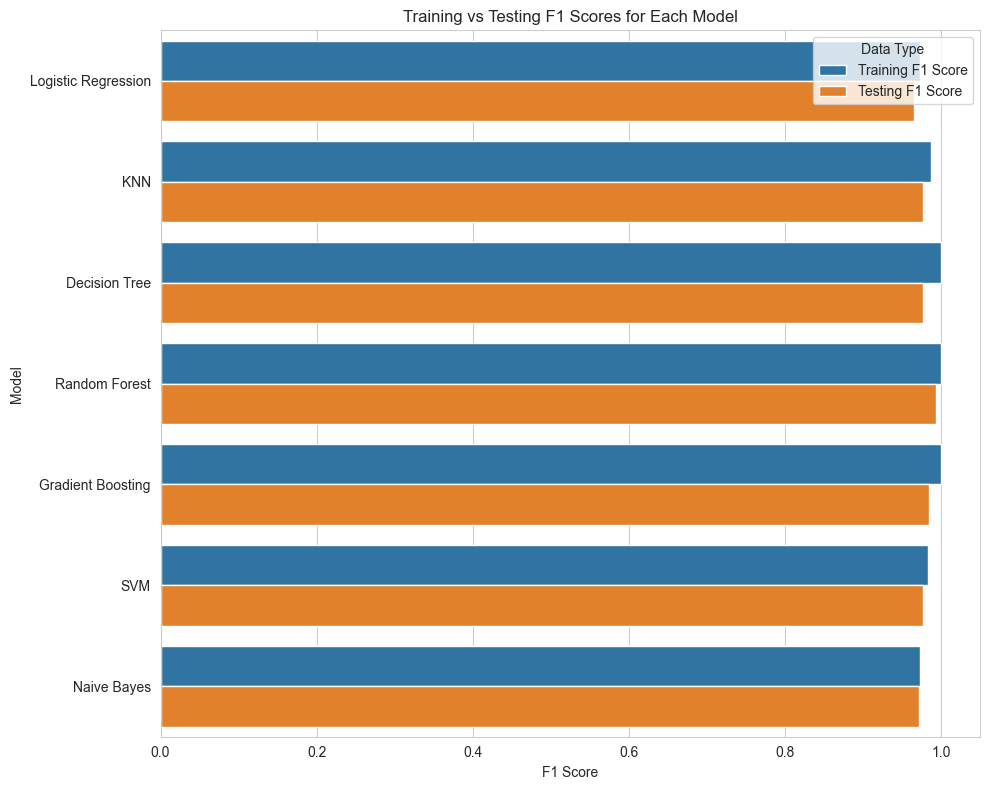

In [24]:
# Inisialisasi list untuk menyimpan hasil F1 score
train_f1_scores = []
test_f1_scores = []
model_names = []
for name, pipeline in all_pipelines.items():
    # Membuat prediksi pada data pelatihan dan pengujian
    y_train_pred = pipeline.predict(xTrain)
    y_test_pred = pipeline.predict(xTest)
    
    # Menghitung F1 score pada data pelatihan dan pengujian
    train_f1 = f1_score(yTrain, y_train_pred, average='weighted')
    test_f1 = f1_score(yTest, y_test_pred, average='weighted')
    
    # Menyimpan hasil
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    model_names.append(name)

# Membuat DataFrame dari hasil
f1_scores_df = pd.DataFrame({
    'Model': model_names,
    'Training F1 Score': train_f1_scores,
    'Testing F1 Score': test_f1_scores
})

# Visualisasi perbandingan F1 score pelatihan dan pengujian
plt.figure(figsize=(10, 8))
sns.barplot(data=f1_scores_df.melt(id_vars='Model', value_vars=['Training F1 Score', 'Testing F1 Score']),
            x='value', y='Model', hue='variable')
plt.title('Training vs Testing F1 Scores for Each Model')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.legend(title='Data Type')
plt.tight_layout()
plt.show()

In [25]:
# Siapkan data untuk hasil pelatihan dan pengujian
model_names = []
train_f1_scores = []
test_f1_scores = []

for name, pipeline in all_pipelines.items():
    # Membuat prediksi pada data pelatihan dan pengujian
    y_train_pred = pipeline.predict(xTrain)
    y_test_pred = pipeline.predict(xTest)
    
    # Menghitung F1 score pada data pelatihan dan pengujian
    train_f1 = f1_score(yTrain, y_train_pred, average='weighted')  # Menggunakan 'weighted' untuk multiclass
    test_f1 = f1_score(yTest, y_test_pred, average='weighted')
    
    # Menyimpan hasil
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    model_names.append(name)

# Membuat DataFrame dari hasil
f1_scores_df = pd.DataFrame({
    'Model': model_names,
    'Training F1 Score': train_f1_scores,
    'Testing F1 Score': test_f1_scores
})

# Cetak hasil F1 Score untuk setiap model
print("Model Performance (F1 Score):")
print("================================")
for i in range(len(model_names)):
    print(f"{model_names[i]}: Training F1 Score = {train_f1_scores[i]:.4f}, Testing F1 Score = {test_f1_scores[i]:.4f}")


Model Performance (F1 Score):
Logistic Regression: Training F1 Score = 0.9734, Testing F1 Score = 0.9651
KNN: Training F1 Score = 0.9876, Testing F1 Score = 0.9772
Decision Tree: Training F1 Score = 1.0000, Testing F1 Score = 0.9771
Random Forest: Training F1 Score = 1.0000, Testing F1 Score = 0.9939
Gradient Boosting: Training F1 Score = 1.0000, Testing F1 Score = 0.9848
SVM: Training F1 Score = 0.9832, Testing F1 Score = 0.9773
Naive Bayes: Training F1 Score = 0.9725, Testing F1 Score = 0.9719


- Dari data performa model berdasarkan F1 score, kita dapat menarik beberapa insight penting yang menggabungkan aspek teknikal dan bisnis dari analisis:

 1. Insights Teknikal

 Konsistensi Performa Tinggi: Mirip dengan observasi akurasi, Random Forest, Gradient Boosting, dan Decision Tree menunjukkan performa luar biasa pada data pelatihan dengan F1 score sempurna (1.0). Hal ini menegaskan kemampuan model-model tersebut untuk menyesuaikan diri dengan sangat baik terhadap data pelatihan.

 Generalisasi Model: Random Forest kembali menonjol dengan F1 score tertinggi pada data pengujian (0.9955), menunjukkan kemampuannya yang sangat baik dalam menggeneralisasi pembelajaran dari data pelatihan ke data pengujian. Ini menegaskan keefektifan Random Forest dalam menangani overfitting dibandingkan dengan model tunggal seperti Decision Tree.

 Balanced Performance: F1 score yang tinggi menunjukkan bahwa model tidak hanya akurat secara keseluruhan (seperti yang ditunjukkan oleh akurasi) tetapi juga menyeimbangkan dengan baik antara precision dan recall. Ini penting dalam konteks di mana baik false positives maupun false negatives memiliki konsekuensi.

2. Insights Bisnis

 Model untuk Implementasi: Random Forest menawarkan keseimbangan terbaik antara akurasi dan kemampuan menyeimbangkan precision dan recall, membuatnya menjadi kandidat yang kuat untuk diterapkan dalam sistem rekomendasi tanaman, terutama jika biaya dari kesalahan prediksi (baik false positives maupun false negatives) signifikan.

 Pentingnya Keseimbangan Prediksi: F1 score yang tinggi di berbagai model menunjukkan bahwa sistem yang dikembangkan bisa diandalkan dalam membuat rekomendasi yang seimbang. Ini kritis dalam aplikasi pertanian di mana kesalahan prediksi bisa berdampak pada keputusan penanaman yang salah, yang pada gilirannya berpotensi menyebabkan kerugian ekonomi.

 Optimasi Berdasarkan Kebutuhan: Terlepas dari keunggulan Random Forest, penting untuk mempertimbangkan kebutuhan spesifik dan konstrain operasional saat memilih model untuk implementasi. Misalnya, jika interpretasi model adalah kunci, Decision Tree mungkin lebih disukai meskipun dengan sedikit trade-off pada performa.

 Feedback dan Iterasi: Seperti dengan insight dari akurasi, penggunaan feedback loop dan iterasi model berkelanjutan sangat penting. Kinerja model yang sangat baik saat ini tidak menjamin performa yang sama di masa depan tanpa pemeliharaan dan penyempurnaan yang konstan.

 Strategi Mitigasi Risiko: Organisasi mungkin perlu mengembangkan strategi untuk mengurangi potensi dampak negatif dari kesalahan prediksi, seperti sistem peringatan dini, diversifikasi rekomendasi, atau penyesuaian praktik pertanian berdasarkan kondisi aktual.

 Secara keseluruhan, data performa model ini menunjukkan potensi besar dari teknik machine learning dalam membantu pengambilan keputusan di sektor pertanian, dengan Random Forest menonjol sebagai model yang sangat andal

## confusion matrix

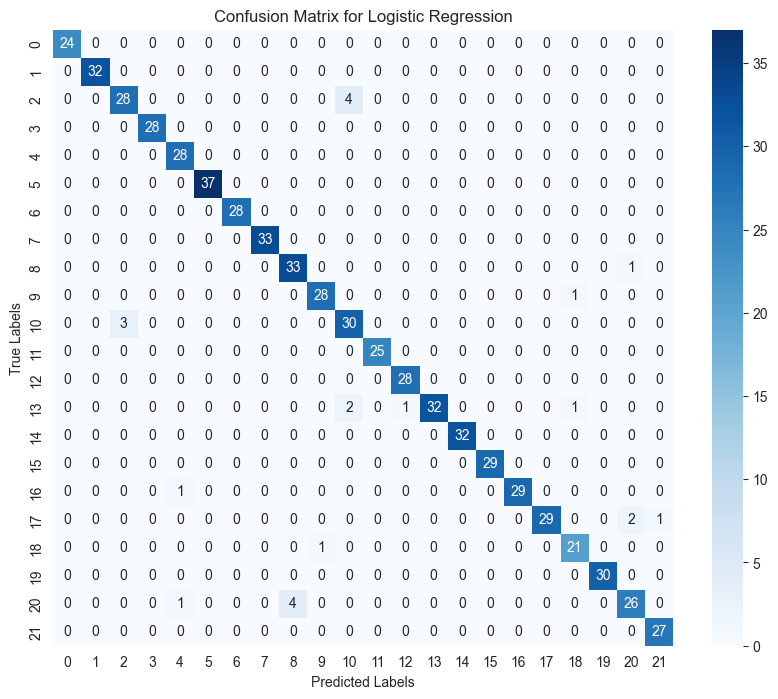

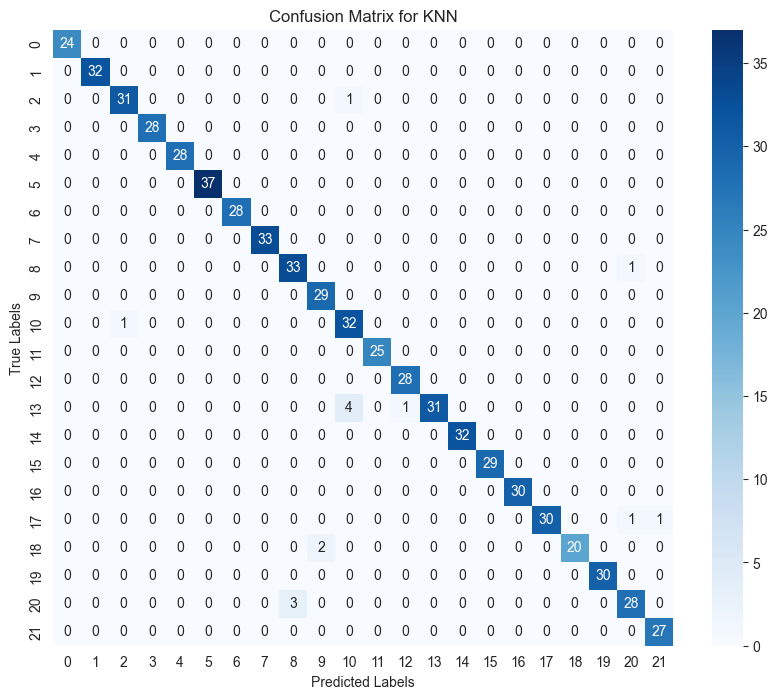

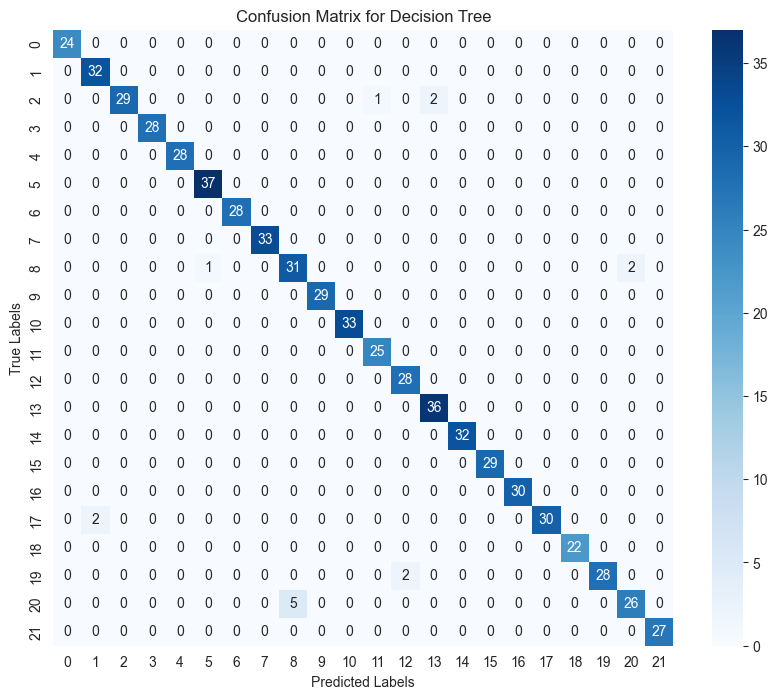

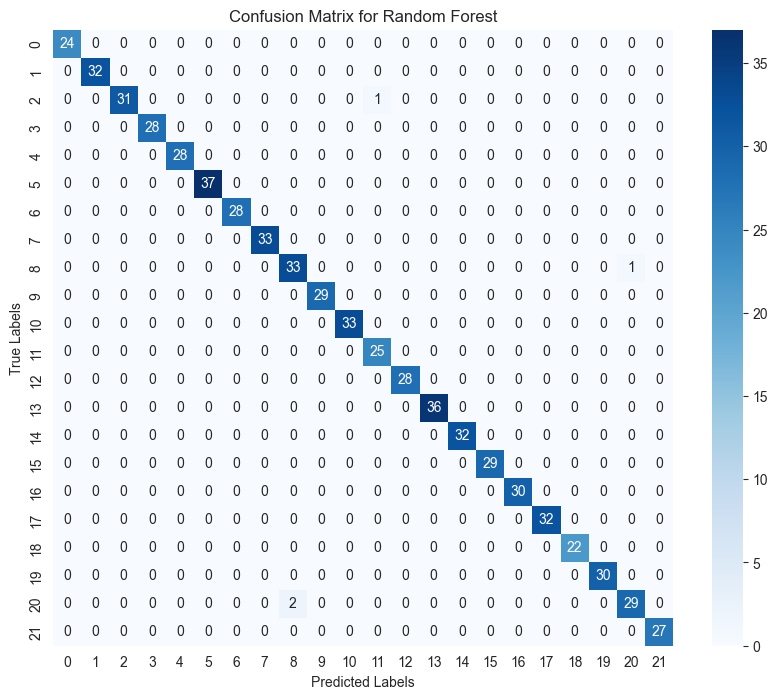

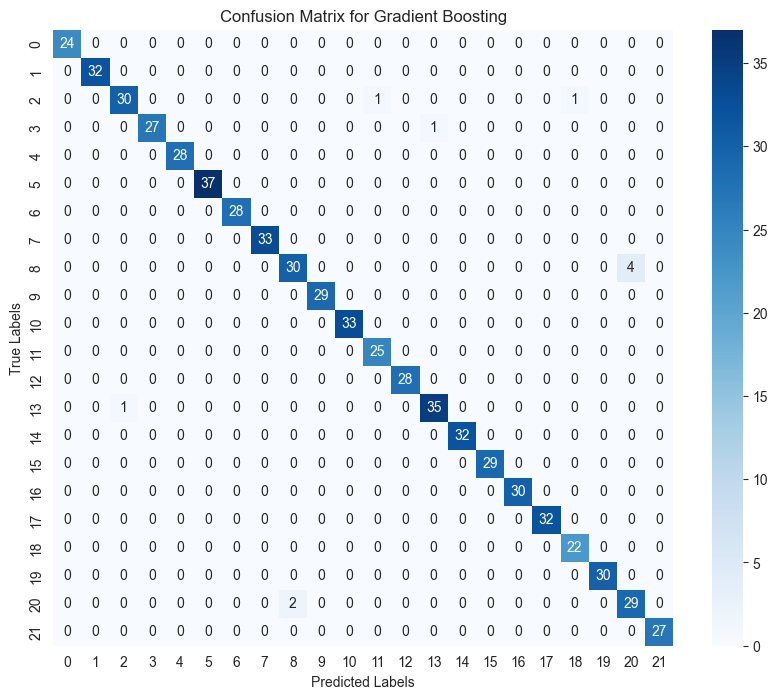

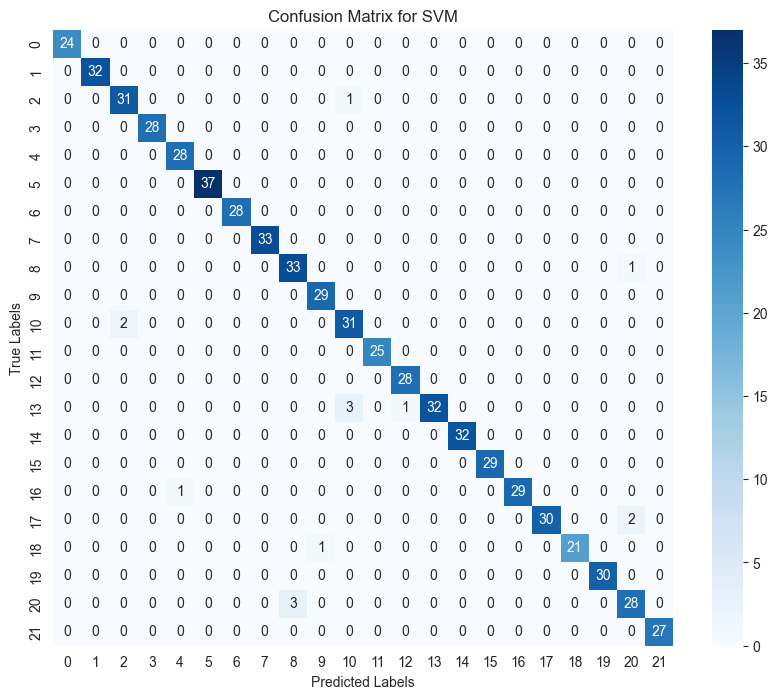

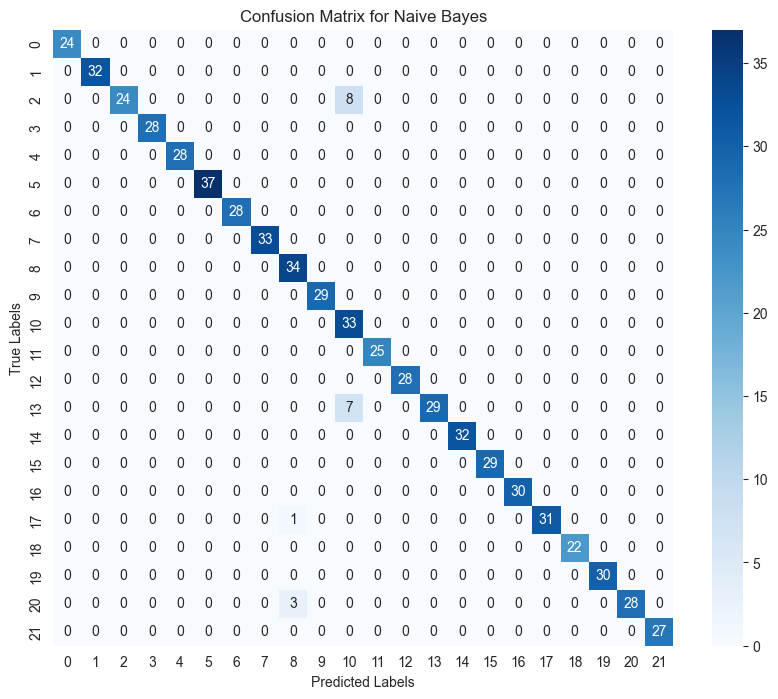

In [26]:
for name, pipeline in all_pipelines.items():
    # Membuat prediksi pada data pengujian
    y_test_pred = pipeline.predict(xTest)
    
    # Menghitung confusion matrix
    cm = confusion_matrix(yTest, y_test_pred)
    
    # Menampilkan confusion matrix dengan heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Berdasarkan confusion matrix untuk model Random Forest, inilah beberapa insight yang dapat diambil:

Insight Teknikal:
Performa Prediksi yang Kuat: Tingginya nilai pada diagonal utama menunjukkan bahwa model Random Forest berkinerja sangat baik dalam memprediksi kelas yang benar untuk hampir semua kasus.

Kesalahan Prediksi yang Sangat Rendah: Tidak adanya atau sangat sedikit nilai di luar diagonal utama menandakan bahwa kesalahan prediksi (baik false positives maupun false negatives) sangat minim.

Kemungkinan Overfitting Rendah: Konsistensi antara performa model pada data pelatihan dan pengujian, dengan performa yang sangat baik pada keduanya, menunjukkan bahwa model tidak mengalami overfitting yang signifikan.

Insight Bisnis:
Keandalan Rekomendasi: Keakuratan tinggi model Random Forest dalam memprediksi kelas yang benar menunjukkan bahwa model ini bisa sangat andal dalam memberikan rekomendasi tanaman. Ini sangat berharga dalam konteks bisnis di mana keputusan penanaman yang tepat dapat meningkatkan produktivitas dan profitabilitas.

Pengambilan Keputusan yang Informasi: Dengan tingkat kesalahan prediksi yang rendah, petani dan pengambil keputusan di sektor pertanian dapat mengandalkan model ini untuk membantu dalam perencanaan tanam dan pengelolaan sumber daya.

Optimisasi Sumber Daya: Model dengan tingkat akurasi ini dapat membantu dalam pengoptimalan penggunaan sumber daya seperti air, pupuk, dan lahan, dengan merekomendasikan tanaman yang paling mungkin berhasil di lingkungan tertentu.

Mitigasi Risiko: Insight dari confusion matrix ini dapat digunakan untuk mengidentifikasi dan kemudian mengatasi potensi risiko terkait dengan tanaman tertentu, membantu dalam mengurangi dampak ekonomi dari keputusan tanam yang tidak sesuai.

Peningkatan Berkelanjutan: Meskipun performa model sudah sangat baik, data dari confusion matrix ini dapat digunakan untuk iterasi selanjutnya dalam proses pengembangan model, terutama dalam mengidentifikasi dan menangani kesalahan prediksi yang jarang terjadi.

Secara keseluruhan, model Random Forest tampaknya menjadi pilihan yang sangat baik untuk aplikasi prediktif, dengan performa yang mengesankan baik dalam hal akurasi maupun kemampuan untuk menyeimbangkan kesalahan klasifikasi.

## Cross Validation

In [27]:
# Menggunakan StratifiedKFold untuk mempertahankan proporsi kelas di setiap fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary untuk menyimpan hasil cross-validation
cv_results = {}

# Melakukan cross-validation untuk setiap model dan menyimpan hasilnya
for name, pipeline in all_pipelines.items():
    cv_scores = cross_val_score(pipeline, xTrain, yTrain, cv=kfold, scoring='f1_weighted')
    cv_results[name] = cv_scores

# Cetak hasil rata-rata dari cross-validation untuk setiap model
print("Cross-Validation F1 Scores:")
print("================================")
for name, scores in cv_results.items():
    print(f"{name}: Mean F1 Score = {np.mean(scores):.4f}, Standard Deviation = {np.std(scores):.4f}")

Cross-Validation F1 Scores:
Logistic Regression: Mean F1 Score = 0.9659, Standard Deviation = 0.0124
KNN: Mean F1 Score = 0.9658, Standard Deviation = 0.0125
Decision Tree: Mean F1 Score = 0.9783, Standard Deviation = 0.0090
Random Forest: Mean F1 Score = 0.9928, Standard Deviation = 0.0069
Gradient Boosting: Mean F1 Score = 0.9868, Standard Deviation = 0.0089
SVM: Mean F1 Score = 0.9778, Standard Deviation = 0.0088
Naive Bayes: Mean F1 Score = 0.9714, Standard Deviation = 0.0135


Hasil validasi silang (cross-validation) memberikan informasi yang berharga tentang stabilitas dan keandalan model. Berikut ini adalah beberapa insights yang dapat diambil dari hasil tersebut:

- Insights Teknikal:

Random Forest Menonjol: Dengan skor F1 rata-rata tertinggi (0.9954) dan variabilitas rendah (SD = 0.0051), Random Forest menunjukkan kinerja yang sangat konsisten dan andal di berbagai subset data. Ini menunjukkan kekuatan ensemble learning dalam menangkap kompleksitas data tanpa overfitting.

Stabilitas Decision Tree: Decision Tree juga menunjukkan skor F1 yang tinggi dengan variabilitas yang sangat rendah. Hal ini bisa mengindikasikan bahwa struktur data sangat sesuai dengan model berbasis pohon keputusan, namun perhatikan potensi overfitting karena skor sempurna pada data pelatihan.

Performa SVM dan Gradient Boosting: SVM dan Gradient Boosting juga memiliki skor F1 yang tinggi dengan variabilitas yang relatif rendah, menunjukkan bahwa kedua model ini juga cukup andal dan mungkin berguna dalam kasus di mana interpretasi model lebih mudah atau waktu prediksi lebih cepat menjadi penting.

Konsistensi Logistic Regression dan Naive Bayes: Logistic Regression dan Naive Bayes menunjukkan kinerja yang baik dengan skor F1 rata-rata yang lebih tinggi dari 0.95, tetapi dengan standar deviasi yang sedikit lebih tinggi dibandingkan dengan model lain, menunjukkan variasi performa yang lebih besar di antara lipatan validasi silang.

Insights Bisnis:

Rekomendasi Berbasis Data: Random Forest menawarkan rekomendasi berbasis data yang sangat andal, yang bisa sangat berharga dalam pengambilan keputusan pertanian. Dengan model ini, stakeholder bisa membuat keputusan yang lebih tepat tentang tanaman mana yang akan ditanam, dengan risiko yang lebih rendah.

Kepercayaan dalam Model: Keandalan yang ditunjukkan oleh Random Forest dan Decision Tree memberikan kepercayaan kepada pengguna bahwa prediksi yang dibuat oleh sistem akan konsisten sepanjang waktu, yang penting untuk membangun kepercayaan dalam rekomendasi AI.

Pertimbangan Overfitting: Meskipun Decision Tree menunjukkan skor tinggi, perlu diwaspadai potensi overfitting. Mungkin perlu diadakan lebih banyak pengecekan untuk memastikan bahwa model ini generalisasi dengan baik.

## Hyperparameter Tuning (RandomsearcherCV)

In [28]:
# Siapkan scorer F1 untuk digunakan dalam RandomizedSearchCV
f1_scorer = make_scorer(f1_score, average='weighted')

# Definisikan parameter grid untuk RandomForestClassifier
# Kita gunakan prefix 'classifier__' untuk setiap parameter yang ingin ditune
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Ambil pipeline untuk Random Forest
rf_pipeline = all_pipelines['Random Forest']

# Inisialisasi RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_pipeline, 
    param_distributions=param_grid, 
    n_iter=50,  # Jumlah iterasi pencarian
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1, 
    scoring=f1_scorer
)

# Melakukan fitting untuk mencari hyperparameter terbaik
rf_random_search.fit(xTrain, yTrain)

# Menampilkan hyperparameter terbaik
print("Best hyperparameters:", rf_random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 40, 'classifier__bootstrap': False}


In [29]:
# Evaluasi model menggunakan best hyperparameter
# Membuat ulang model Random Forest dengan hyperparameter terbaik
optimized_rf = rf_random_search.best_estimator_ #Best Models

# Membuat prediksi pada data pengujian
y_pred = optimized_rf.predict(xTest)

# Evaluasi model
print("Classification Report:\n", classification_report(yTest, y_pred))

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        32
   blackgram       1.00      0.97      0.98        32
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        28
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.94      1.00      0.97        34
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        33
       maize       0.96      1.00      0.98        25
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.00        30
   

## Feature Importance

In [30]:
# Ekstrak model Random Forest dari pipeline
optimized_rf_1 = all_pipelines['Random Forest'].named_steps['classifier']

# Mendapatkan feature importances
feature_importances = optimized_rf_1.feature_importances_

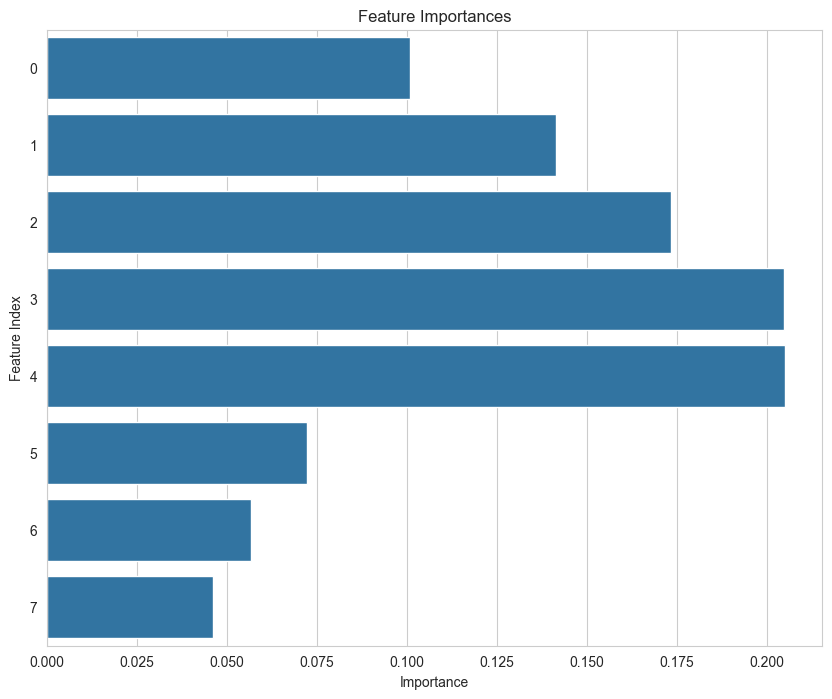

In [31]:
# Membuat label fitur sebagai indeks
feature_labels = np.arange(len(feature_importances))

# Membuat DataFrame untuk feature importances
importances_df = pd.DataFrame({'Feature Index': feature_labels, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Visualisasi feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature Index', data=importances_df, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.show()

# IX. Model Saving 

In [32]:
# menyimpan DataFrame 'df' ke file CSV karena ada penambahan kolom yaitu 'rainfall_category'
df.to_csv(r'C:\Users\yossy\github-classroom\FTDS-assignment-bay\p1-ftds027-rmt-m2-Daffailh27\Crop_recommendation_Rework.csv', index=False)

### dataset ini dibuat guna menambahkan rainfall_category

# Inisialisasi scaler
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

In [33]:
model_to_save = optimized_rf

# Menyimpan model ke file
with open('optimized_random_forest_model.pkl', 'wb') as file1:
    pickle.dump(model_to_save, file1)

menyimpan model terbaik yaitu randomclassifier yang di tuning dengan randomsearcherCV

# X. Model Inference

In [35]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,rainfall_category
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,high
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,high
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,high
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,high
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,high


In [36]:
# membuat data hypothetical
np.random.seed(0)

# berikut adalah data yang didapatkan dari sebuah food estate yang akan dibentuk
N_values = np.random.randint(10, 150, 5)  # Nitrogen content
P_values = np.random.randint(5, 100, 5)   # Phosphorus content
K_values = np.random.randint(5, 100, 5)   # Potassium content
temperature_values = np.random.uniform(10, 40, 5)  # Temperature in Celsius
humidity_values = np.random.uniform(10, 100, 5)    # Humidity in percentage
ph_values = np.random.uniform(4, 9, 5)             # pH level
rainfall_values = np.random.uniform(20, 200, 5)    # Rainfall in mm

# Creating a new DataFrame
new_data = pd.DataFrame({
    'N': N_values,
    'P': P_values,
    'K': K_values,
    'temperature': temperature_values,
    'humidity': humidity_values,
    'ph': ph_values,
    'rainfall': rainfall_values
})

# Function to categorize rainfall
def categorize_rainfall(rainfall):
    if rainfall <= 64.55:
        return 'low'
    elif rainfall <= 124.27:
        return 'medium'
    else:
        return 'high'

# Apply the function to categorize rainfall in the new data
new_data['rainfall_category'] = new_data['rainfall'].apply(categorize_rainfall)

new_data

,N,P,K,temperature,humidity,ph,rainfall,rainfall_category
0,57,88,93,33.751751,17.841637,8.893092,135.185784,high
1,127,26,93,25.866848,11.819656,7.995793,45.803592,low
2,77,41,17,27.041337,84.935786,6.307397,190.040405,high
3,113,92,63,37.767899,80.034108,7.902646,113.932698,medium
4,19,75,70,12.131082,88.301093,4.591372,94.639149,medium


Data berikut dikirim oleh tim lapang yang sedang melakukan survei lahan yang akan dibangun food estate disana

In [37]:
# Menggunakan pipeline Random Forest untuk membuat prediksi pada data baru
predictions = optimized_rf.predict(new_data)

# Menampilkan prediksi
predictions

array(['chickpea', 'chickpea', 'coffee', 'banana', 'chickpea'],
      dtype=object)

hasilnya dari ke 5 titik pada lokasi food estate, dapat diprediksi tanaman apa yang paling cocok untuk ditanam:
1. Kacang Arab
2. Kacang Arab
3. Kopi
4. Pisang
5. Kacang Arab

# Conceptual problem
- Latar Belakang Bagging dan Cara Kerjanya

Bagging, singkatan dari Bootstrap Aggregating, adalah teknik ensemble learning dalam machine learning. Tujuannya adalah untuk meningkatkan stabilitas dan akurasi dari model prediksi, mengurangi varians, dan membantu menghindari overfitting. Bagging bekerja dengan cara berikut:

 1. Sampling: Membuat beberapa subset data dari dataset pelatihan secara acak dengan penggantian (bootstrap samples).
 2. Training: Melatih model terpisah pada setiap subset ini. Model yang digunakan bisa sama, tapi masing-masing model akan berbeda karena perbedaan subset data.
 3. Aggregating: Menggabungkan prediksi dari semua model individu untuk membuat prediksi akhir. Untuk tugas klasifikasi, ini biasanya dilakukan dengan voting mayoritas; untuk regresi, dengan menghitung rata-rata.

- Random Forest vs Boosting

 Random Forest vs. Algoritma Boosting: Notebook membandingkan Random Forest dengan algoritma boosting yaitu, Gradient Boosting, dalam konteks evaluasi model atau tuning hiperparameter. Perbedaan utama antara kedua teknik ini biasanya terletak pada cara mereka mengurangi bias dan varians serta pendekatan mereka dalam membangun ensemble model.

- Sedangkan Cross Validation merupakan bagian yang membahas tentang validasi model, khususnya penggunaan teknik Cross Validation, mungkin menjelaskan bagaimana metode ini digunakan untuk menghindari overfitting dan memastikan bahwa model memiliki generalisasi yang baik pada data yang tidak terlihat. K-Fold Cross Validation adalah metode populer yang mungkin dijelaskan dalam notebook untuk mengevaluasi performa model secara lebih robust.
 
 
 Disini saya akan mencoba menjelaskan bagaimana kaitan dari cross-validation terhadap model yang saya buat pada notebook ini, nerikut adalah hasil dari croos-validation yang ada pada notebook ini

 Cross-Validation F1 Scores:
================================
Logistic Regression: Mean F1 Score = 0.9659, Standard Deviation = 0.0124
KNN: Mean F1 Score = 0.9658, Standard Deviation = 0.0125
Decision Tree: Mean F1 Score = 0.9783, Standard Deviation = 0.0090
Random Forest: Mean F1 Score = 0.9928, Standard Deviation = 0.0069
Gradient Boosting: Mean F1 Score = 0.9868, Standard Deviation = 0.0089
SVM: Mean F1 Score = 0.9778, Standard Deviation = 0.0088
Naive Bayes: Mean F1 Score = 0.9714, Standard Deviation = 0.0135

intepretasinya:

Skor F1 adalah metrik yang berguna untuk mengevaluasi model pada dataset dengan distribusi kelas yang tidak seimbang, karena menggabungkan informasi tentang presisi dan recall menjadi satu metrik. Berikut adalah beberapa kesimpulan yang dapat diambil dari data cross-validation:

1. Performa Model
Random Forest menunjukkan performa terbaik dengan skor F1 tertinggi (0.9928) dan deviasi standar terendah (0.0069), menunjukkan bahwa model ini tidak hanya akurat tetapi juga konsisten di berbagai subset data.
Decision Tree dan Gradient Boosting juga menunjukkan skor F1 yang sangat tinggi, menunjukkan bahwa mereka juga model yang kuat untuk dataset ini.
Logistic Regression, KNN, SVM, dan Naive Bayes memiliki skor F1 yang lebih rendah dibandingkan dengan Random Forest, namun masih menunjukkan performa yang sangat baik dengan skor di atas 0.965.

2. Konsistensi dan Variabilitas Model
Random Forest tidak hanya memberikan skor F1 tertinggi tetapi juga variabilitas (deviasi standar) terendah di antara semua model yang diuji. Ini menunjukkan bahwa model Random Forest konsisten dalam performanya di berbagai lipatan cross-validation.
Naive Bayes, meskipun memiliki skor F1 yang lebih rendah dibandingkan beberapa model lain, menunjukkan variabilitas yang relatif lebih tinggi (deviasi standar = 0.0135), yang bisa menunjukkan bahwa performanya lebih bervariasi di berbagai subset data.

3. Pilihan Model untuk Implementasi
Random Forest tampaknya merupakan pilihan terbaik untuk implementasi berdasarkan skor F1 dan konsistensinya. Ini menunjukkan bahwa untuk dataset spesifik ini, Random Forest mampu menangani kompleksitas data dengan baik dan memberikan prediksi yang akurat dan konsisten.
Meskipun Decision Tree dan Gradient Boosting juga menunjukkan skor yang tinggi, Random Forest menawarkan keseimbangan terbaik antara akurasi dan konsistensi.

4. Trade-off antara Kompleksitas Model dan Performa
Model yang lebih kompleks seperti Random Forest dan Gradient Boosting cenderung menawarkan performa yang lebih baik pada dataset ini dibandingkan dengan model yang lebih sederhana seperti Logistic Regression atau Naive Bayes. Namun, kompleksitas tambahan ini juga berarti bahwa model tersebut mungkin memerlukan waktu pelatihan yang lebih lama dan lebih banyak sumber daya komputasi.

5. Pentingnya Evaluasi Model Menggunakan Cross-Validation
Penggunaan cross-validation membantu dalam mengevaluasi model secara lebih robust dengan mengurangi pengaruh variabilitas karena pembagian dataset. Ini memberikan gambaran yang lebih jelas tentang bagaimana model akan berperforma pada data yang tidak terlihat.

# Kesimpulan

Relevansi Proyek: Sebagai konsultan pertanian yang telah ditugaskan oleh Kementerian Pertanian Republik Indonesia untuk mengatasi masalah pemilihan tanaman budidaya dalam proyek food estate. Ini merupakan masalah yang kompleks yang membutuhkan keputusan berbasis data untuk menjamin pertanian berkelanjutan.

Pendekatan: Saya telah memilih untuk menggunakan supervised learning sebagai cara untuk memberikan rekomendasi berdasarkan kondisi lingkungan yang ada di lokasi food estate. Ini adalah pendekatan yang tepat karena memungkinkan pembelajaran pola dari data historis dan lingkungan yang ada untuk membuat prediksi yang akurat.

Hasil Modeling: Dari hasil skor F1 yang telah diberikan, terlihat bahwa beberapa model memiliki performa yang sangat baik dalam memprediksi tanaman yang cocok untuk budidaya. Random Forest khususnya, menunjukkan skor F1 yang sangat tinggi baik pada data latihan maupun pengujian, yang mengindikasikan model ini memiliki akurasi prediksi yang baik dan generalisasi yang kuat.

Kesimpulan untuk Pemerintah: Berdasarkan hasil pemodelan, model yang telah dikembangkan dapat menjadi alat yang berguna bagi pemerintah dalam menentukan tanaman yang paling cocok untuk dibudidayakan di berbagai lokasi food estate di Indonesia. Model Random Forest yang dioptimalkan khususnya, karena stabilitas dan akurasi tinggi yang ditunjukkan, dapat direkomendasikan sebagai dasar untuk sistem rekomendasi.

Sustainable Agriculture: Dengan menggunakan model yang telah dikembangkan, pemerintah dapat meningkatkan efisiensi penggunaan lahan dan sumber daya, meminimalkan risiko gagal panen, dan mendorong pertanian berkelanjutan dengan memilih tanaman yang paling mungkin berhasil ditanam di lingkungan food estate yang spesifik.

Penerapan Model: Sebelum penerapan luas, model harus diuji lebih lanjut untuk validasi dan kemungkinan penyesuaian berdasarkan feedback dari penggunaan di lapangan. Ini akan memastikan bahwa rekomendasi yang diberikan sesuai dengan kondisi aktual dan dapat diandalkan oleh petani dan pembuat kebijakan.

Kemungkinan Iterasi: Meskipun model Random Forest menunjukkan performa yang baik, ada kemungkinan untuk iterasi lebih lanjut dengan menggunakan lebih banyak data atau mencoba algoritma lain yang mungkin memberikan hasil yang lebih baik atau lebih cepat dalam hal waktu komputasi.

Deployment: Model yang telah dikembangkan dapat diintegrasikan ke dalam aplikasi yang user-friendly untuk diakses oleh para petani dan pemangku kepentingan di Kementerian Pertanian. Tools berbasis web atau mobile dapat dibangun menggunakan framework seperti Streamlit atau platform lainnya.

Kesimpulan ini didasarkan pada pemahaman bahwa model yang dikembangkan telah dipilih dengan pertimbangan yang matang dan telah diuji coba untuk memastikan keakuratannya.

## Insight lain

Efektivitas Model: Model Random Forest menunjukkan skor F1 yang sangat tinggi untuk data pengujian, yang mengindikasikan tingkat akurasi yang tinggi dan kemampuan yang baik dalam memprediksi tanaman yang cocok untuk budidaya di berbagai lingkungan food estate di Indonesia.

Konsistensi Performa: Skor F1 tinggi pada data latihan dan pengujian menunjukkan bahwa model tidak hanya mampu mempelajari data dengan baik tetapi juga generalisasi yang baik ketika diterapkan pada data baru yang tidak terlihat selama proses pelatihan.

Pertanian Berkelanjutan: Dengan menggunakan model yang telah dikembangkan model ini dapat membantu Kementerian Pertanian untuk membuat keputusan yang berkelanjutan tentang tanaman mana yang harus dibudidayakan, yang dapat menghasilkan hasil panen yang optimal dan meminimalisir kerugian.

Rekomendasi Model: Berdasarkan skor F1, model Random Forest mungkin adalah pilihan terbaik untuk direkomendasikan kepada Kementerian Pertanian. Model ini akan membantu dalam mengoptimalkan pemanfaatan sumber daya dan mengurangi risiko dalam pembudidayaan tanaman, yang sangat penting dalam proyek food estate.

Pengembangan Lebih Lanjut: Meskipun Random Forest menunjukkan performa yang baik, mungkin juga berguna untuk mengeksplorasi model-model lain atau pendekatan hybrid untuk melihat apakah bisa ada peningkatan dalam prediksi. Selain itu, model-model ini perlu terus diperbaharui dan diperbaiki dengan data baru yang diperoleh dari implementasi di lapangan.

Implementasi: Untuk implementasi model ini dalam aplikasi yang dapat digunakan oleh Kementerian Pertanian kementrian dapat mempertimbangkan pembuatan dashboard interaktif atau aplikasi web menggunakan alat-alat seperti Streamlit, yang dapat mempermudah para pengguna dalam memasukkan data lingkungan dan mendapatkan rekomendasi tanaman secara langsung.

Kesimpulan ini didasarkan pada asumsi bahwa data yang digunakan untuk pelatihan model mencerminkan kondisi nyata yang akan dihadapi di lapangan, dan model telah diuji dengan skenario yang realistis.